In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
# Constants
h = 10.0
v_opts = [1.0, 2.0, 3.0, 4.0]
f = 12.0
n1 = 1.0
n2 = 1.5

# Design Variables
x = 1.1
w = 0.0 # 1.0

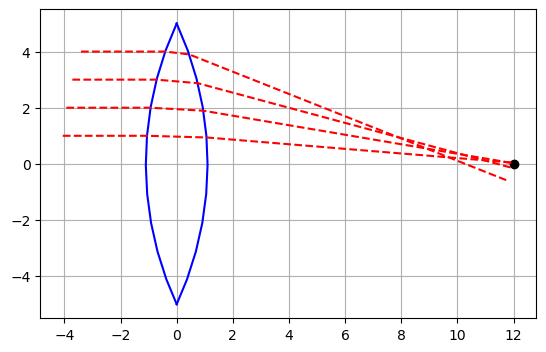

In [43]:
# Get base plot handles and visualize the lens
R = x / 2.0 + h**2 / (8.0 * x)

cx_left = R - x
cx_right = w + x - R
th_draw = np.arcsin(h / 2.0 / R)
th_draw_lspace = np.arange(th_draw, -th_draw, -np.radians(5.0))
th_draw_lspace = np.append(th_draw_lspace, -th_draw)

lens_left_x = cx_left - R * np.cos(th_draw_lspace)
lens_left_y = R * np.sin(th_draw_lspace)
lens_right_x = cx_right + R * np.cos(th_draw_lspace)
lens_right_y = R * np.sin(th_draw_lspace)
lens_mid_x = np.array([0, w])
lens_mid_y1 = np.array([h / 2.0, h / 2.0])
lens_mid_y2 = np.array([-h / 2.0, -h / 2.0])

fig, ax = plt.subplots()

ax.plot(lens_left_x, lens_left_y, "b-")
ax.plot(lens_mid_x, lens_mid_y1, "b-")
ax.plot(lens_mid_x, lens_mid_y2, "b-")
ax.plot(lens_right_x, lens_right_y, "b-")
ax.plot(w / 2.0 + f, 0, "ko")

# Plot modeled ray traces
for v in v_opts:
    th1 = np.arcsin(v / R)
    th2 = np.arcsin(n1 * np.sin(th1) / n2)
    
    ray_path_x = np.array([cx_left - R * np.cos(th1) - 3.0, cx_left - R * np.cos(th1)])
    ray_path_y = np.array([v, v])
    
    gamma = R - np.sqrt(R**2 - v**2)
    _y = (x - gamma + w) * np.tan(th1 - th2)
    _tau = v - _y
    
    ray_path_x = np.append(ray_path_x, w)
    ray_path_y = np.append(ray_path_y, _tau)
    
    _th = th1 - th2
    _alpha = _tau / np.tan(_th) + R - x
    _beta = 1.0 / np.tan(_th)
    _yr = (_alpha * _beta - np.sqrt(-_alpha**2 + R**2 * (_beta**2 + 1))) / (_beta**2 + 1)
    _xr = cx_right + np.sqrt(R**2 - _yr**2)
    
    ray_path_x = np.append(ray_path_x, _xr)
    ray_path_y = np.append(ray_path_y, _yr)
    
    psi = np.arcsin(_yr / R)
    rho = th1 - th2 + psi
    eta = np.arcsin(n2 * np.sin(rho) / n1)
    thf = psi - eta
    df = np.sqrt(_yr**2 + (w / 2.0 + f - _xr)**2)
    
    _xf = _xr + df * np.cos(thf)
    _yf = _yr + df * np.sin(thf)
    
    ray_path_x = np.append(ray_path_x, _xf)
    ray_path_y = np.append(ray_path_y, _yf)
    
    ax.plot(ray_path_x, ray_path_y, "r--")

plt.gca().set_aspect('equal')
ax.grid()